<h1><center> Data Collection - Spotify Genres , Artist Followers, Explicity  </center></h1>

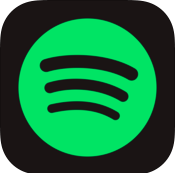

In [8]:
from spotipy.oauth2 import SpotifyClientCredentials
import json

import spotipy
import spotipy.util as util
import time
import sys

import pandas as pd
import numpy as np

In [129]:
df = pd.read_csv('../00_Data/df_for_eda.csv')

### Client Authorization token

In [92]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print ("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username,scope,client_id='23e7ed135658410698818505b543dabb',client_secret='a86d41a058e64658b83d7c5900dff17f',redirect_uri='http://localhost/')


client_credentials_manager = SpotifyClientCredentials(client_id= '23e7ed135658410698818505b543dabb',
                                                      client_secret= 'a86d41a058e64658b83d7c5900dff17f')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager , auth = token )

### Function to acquire the genre(s) that each artist sings along with their followers

- Some artist belong to one Genre , while some Artist have multiple genres they perform
- Spotify contains artist that perform over 1000 Genres

In [125]:
def get_genres_followers(artist):
    results = sp.search( artist , type = 'artist')
    genres = results['artists']['items'][0]['genres']
    followers = results['artists']['items'][0]['followers']['total']
    list = []
    list.append([genres , followers])
    return list

In [144]:
genres_list = []
followers_list = []
artist_list = []

### For loop

In [145]:
for i in list(df.artist.unique()):
    try:
        info = get_genres_followers(i)
        for genres , followers in info:
            genres_list.append(genres)
            followers_list.append(followers)
            artist_list.append(i)
            
    except:
        time.sleep(1)
        scope = 'user-library-read'

        if len(sys.argv) > 1:
            username = sys.argv[1]
        else:
            print ("Usage: %s username" % (sys.argv[0],))
            sys.exit()

        token = util.prompt_for_user_token(username,scope,client_id='23e7ed135658410698818505b543dabb',client_secret='a86d41a058e64658b83d7c5900dff17f',redirect_uri='http://localhost/')


        client_credentials_manager = SpotifyClientCredentials(client_id= '23e7ed135658410698818505b543dabb',
                                                              client_secret= 'a86d41a058e64658b83d7c5900dff17f')
        sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager , auth = token )

In [149]:
first_dict = {'genres' : genres_list , 
             'followers' : followers_list,
             'artists' : artist_list}
genre_followers = pd.DataFrame(first_dict)

### Function to get whether or not a track contain explicit lyrics

- True = Track contains explicit lyrics
- False = Track does not contain explicit lyrics

In [150]:
def is_explicit(id):
    result = sp.track(id)
    explicit = result['explicit']
    id_num = id
    list = []
    list.append([explicit , id_num])
    return list

In [155]:
is_explicit_list = []
id_list = []

In [169]:
for i in df.track_id:
    try:
        info = is_explicit(i)
        for exp , id in info:
            is_explicit_list.append(exp)
            id_list.append(id)
            
    except:
        time.sleep(1.5)
        scope = 'user-library-read'

        if len(sys.argv) > 1:
            username = sys.argv[1]
        else:
            print ("Usage: %s username" % (sys.argv[0],))
            sys.exit()

        token = util.prompt_for_user_token(username,scope,client_id='23e7ed135658410698818505b543dabb',client_secret='a86d41a058e64658b83d7c5900dff17f',redirect_uri='http://localhost/')


        client_credentials_manager = SpotifyClientCredentials(client_id= '23e7ed135658410698818505b543dabb',
                                                              client_secret= 'a86d41a058e64658b83d7c5900dff17f')
        sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager , auth = token )

In [171]:
second_dict = {'explicit' : is_explicit_list ,
              'id' : id_list}

In [175]:
genre_followers = pd.DataFrame(first_dict)

In [173]:
explicit_df = pd.DataFrame(second_dict)

### Export to CSV for later use

In [176]:
genre_followers.to_csv('../00_Data/genre_followers.csv' , index = False)
explicit_df.to_csv('../00_Data/explicit.csv' , index = False)